In [26]:
%matplotlib notebook
import matplotlib.pyplot as plt
import time
import numpy as np
import qcodes as qc
from qcodes.dataset.data_set import get_data
from qcodes import load_by_id

In [20]:
qc.config['core']['db_location'] = r"D:\OneDrive\BF2\Data\experiments.db"

In [35]:
t0 = time.clock()
dv1 = qc.load_by_id(605)

inner_1 = np.unique(np.array(dv1.get_data("awg_ramp_voltages"))*2/100)
inner_2 = np.unique(np.array(dv1.get_data("ivvi_dac7"))*5/1000) #plunger
inner_3 = np.unique(np.array(dv1.get_data("ivvi_dac6"))*5/1000) #cutter

y = np.array(dv1.get_data('detector_signal_abs'))
print((time.clock()-t0)/60, 'min')

4.77062893696538 min


In [36]:
print('min inner_1 =', min(inner_1),'\nmax inner_1 =', max(inner_1))
print('\nmin inner_2 =', min(inner_2),'\nmax inner_2 =', max(inner_2))
print('\nmin inner_3 =', min(inner_3),'\nmax inner_3 =', max(inner_3))

min inner_1 = -0.0005 
max inner_1 = 0.0005

min inner_2 = -6.0 
max inner_2 = 0.999923704891

min inner_3 = 0.000152590218967 
max inner_3 = 2.0


## Useful functions

In [37]:
def find_nearest(array, value):
    idx_closest = np.argmin(abs(array - value))
    return idx_closest

In [38]:
def return_idx_array(array, value_array):
    idx = []
    for k in range(np.size(value_array)):
        idx.append(find_nearest(array,value_array[k]))
    return idx

## Phase diagrams data analysis

### First cut for 2D plot

#### Bias vs plunger
Change cutter as value_1

0.000152590218967


<IPython.core.display.Javascript object>


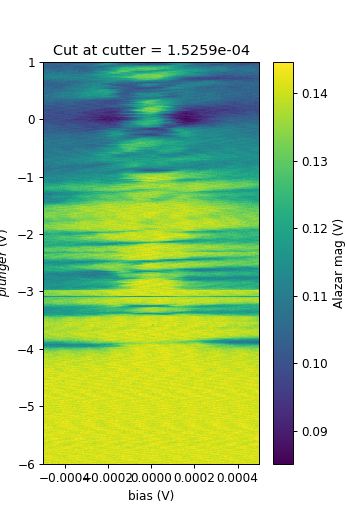

In [39]:
loop_1 = inner_3
value_1 = 0

idx_1 = find_nearest(loop_1,value_1)
print(loop_1[idx_1])

y_p = y.reshape(len(inner_3), len(inner_2), len(inner_1), 2)

y_plot = y_p[idx_1,:,:,1]

min_y = min(np.unique(y_plot))
max_y = max(np.unique(y_plot))

fig = plt.figure(figsize=(4,6))

ax1 = plt.subplot(111)
#ax2 = plt.subplot(212)


p = ax1.pcolor(inner_1, inner_2, y_plot, vmin=min_y, vmax=max_y)
#ax1.axhline(y=frequency_cut/1e6, color='red', linestyle='dotted')
ax1.set_xlabel(r"bias (V)")
ax1.set_ylabel(r"$plunger$ (V)")
ax1.set_title('Cut at cutter = {:.4e}'.format(loop_1[idx_1]))
plt.colorbar(p, ax=ax1, label = r'Alazar mag (V)')

#### Bias vs cutter
Change plunger as value_1

0.00259403372244


<IPython.core.display.Javascript object>


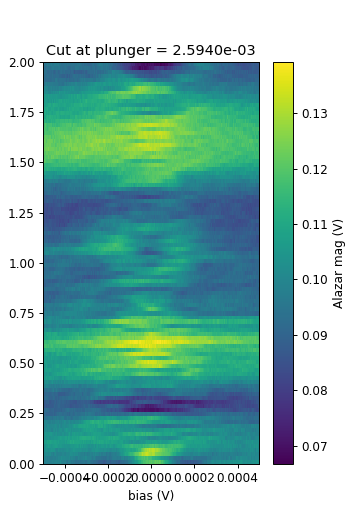

In [40]:
loop_1 = inner_2
value_1 = 0

idx_1 = find_nearest(loop_1,value_1)
print(loop_1[idx_1])

y_p = y.reshape(len(inner_3), len(inner_2), len(inner_1), 2)

y_plot = y_p[:,idx_1,:,1]

min_y = min(np.unique(y_plot))
max_y = max(np.unique(y_plot))

fig = plt.figure(figsize=(4,6))

ax1 = plt.subplot(111)
#ax2 = plt.subplot(212)


p = ax1.pcolor(inner_1, inner_3, y_plot, vmin=min_y, vmax=max_y)
#ax1.axhline(y=frequency_cut/1e6, color='red', linestyle='dotted')
ax1.set_xlabel(r"bias (V)")
ax1.set_ylabel(r"$cutter$ (V)")
ax1.set_title('Cut at plunger = {:.4e}'.format(loop_1[idx_1]))
plt.colorbar(p, ax=ax1, label = r'Alazar mag (V)')

#### plunger vs cutter plot
Change bias as value_1

-2.51256281407e-06


<IPython.core.display.Javascript object>


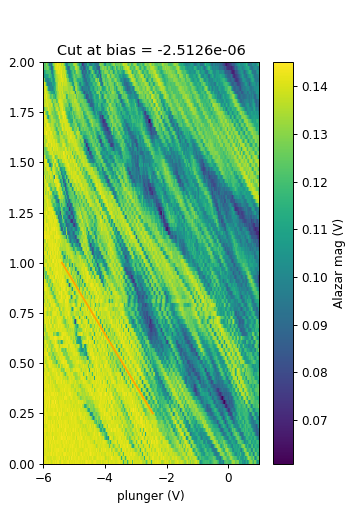

In [41]:
loop_1 = inner_1
value_1 = 0

idx_1 = find_nearest(loop_1,value_1) 
print(loop_1[idx_1])

y_p = y.reshape(len(inner_3), len(inner_2), len(inner_1), 2)

y_plot = y_p[:,:,idx_1,1]

min_y = min(np.unique(y_plot))
max_y = max(np.unique(y_plot))

fig = plt.figure(figsize=(4,6))

ax1 = plt.subplot(111)
#ax2 = plt.subplot(212)


p = ax1.pcolor(inner_2, inner_3, y_plot, vmin=min_y, vmax=max_y)
#ax1.axhline(y=frequency_cut/1e6, color='red', linestyle='dotted')
ax1.set_xlabel(r"plunger (V)")
ax1.set_ylabel(r"$cutter$ (V)")
ax1.set_title('Cut at bias = {:.4e}'.format(loop_1[idx_1]))
plt.colorbar(p, ax=ax1, label = r'Alazar mag (V)')

#### Chemical potential cuts

In [42]:
c1 = 1
c2 = 0.25
p1 = -5.4
p2 = -2.45

p = np.linspace(p1,p2,101)
c = np.linspace(c1,c2,101)
plt.plot(p,c, color='orange')

<IPython.core.display.Javascript object>


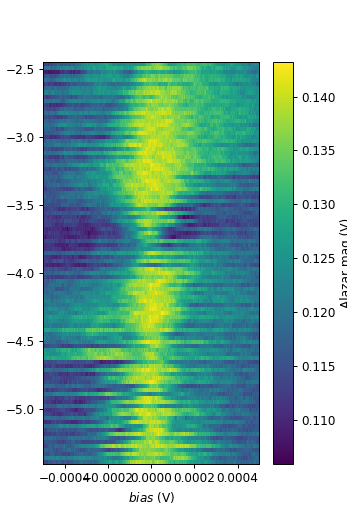

In [43]:
y_plot = y_p[return_idx_array(inner_3,c),return_idx_array(inner_2,p),:,1]

min_y = min(np.unique(y_plot))
max_y = max(np.unique(y_plot))

fig = plt.figure(figsize=(4,6))

ax2 = plt.subplot(111)

p = ax2.pcolor(inner_1, p, y_plot, vmin=min_y, vmax=max_y)
ax2.set_xlabel(r"$bias$ (V)")
ax2.set_ylabel(r"$Chemical potential$ (a.u.)")
plt.colorbar(p, ax=ax2, label = r'Alazar mag (V)')